## chapter 10 : 타이타닉 데이터를 분석하자

### 10.2 그날 밤 타이타닉호에서 무슨 일이 일어났나



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 이 책의 github 저장소에서 파일을 가져옴
main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"
# 타이타닉호 생존자/사망자 데이터 불러오기
titanic_df = pd.read_csv(main_path + 'train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 10.3 데이터의 구조를 탐색하자

In [7]:
# 타이타닉 데이터의 전체적인 형상을 살펴보자
titanic_df.shape

(891, 12)

In [8]:
# 이 책의 github 저장소에서 파일을 가져옴
main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"
# 타이타닉호의 생존 여부 정보가 없는 테스트용 데이터 불러오기
test_df = pd.read_csv(main_path + 'test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test_df.shape

(418, 11)

In [12]:
# 객실 등급에 따른 평균 생존율
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 10.4 시각화 기법을 도입하자

([<matplotlib.axis.XTick at 0x7ffeade98410>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

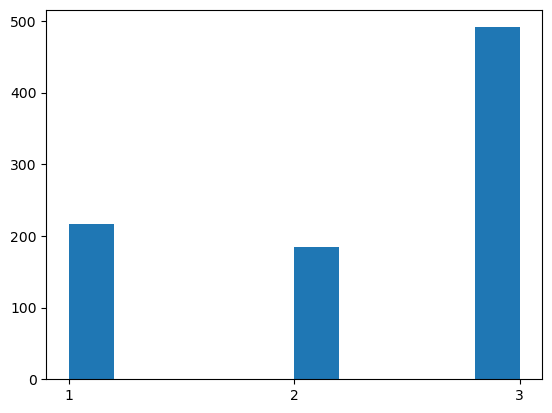

In [15]:
import matplotlib.pyplot as plt

plt.hist(titanic_df['Pclass'])
plt.xticks([1, 2, 3])

([<matplotlib.axis.XTick at 0x7ffeadef8190>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

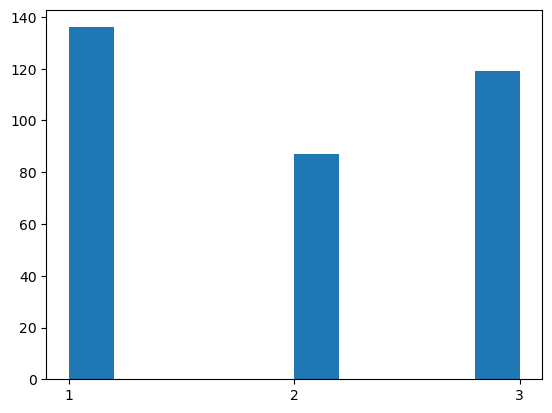

In [16]:
# 생존자 수를 확인하기 위해
# titanic_df.Survived 열이 1인(생존자) 데이터프레임을 만들자
survived = titanic_df[titanic_df.Survived == 1]
plt.hist(survived['Pclass'])
plt.xticks([1, 2, 3])

([<matplotlib.axis.XTick at 0x7ffeadd74e10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

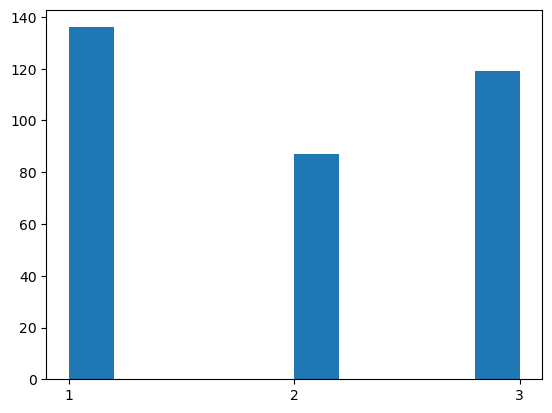

In [17]:
# titanic_df.Survived 열이 1인(생존자) 데이터프레임을 만들자
survived = titanic_df[titanic_df['Survived'] == 1]
plt.hist(survived['Pclass'])
plt.xticks([1, 2, 3])

Text(0, 0.5, 'Num of People')

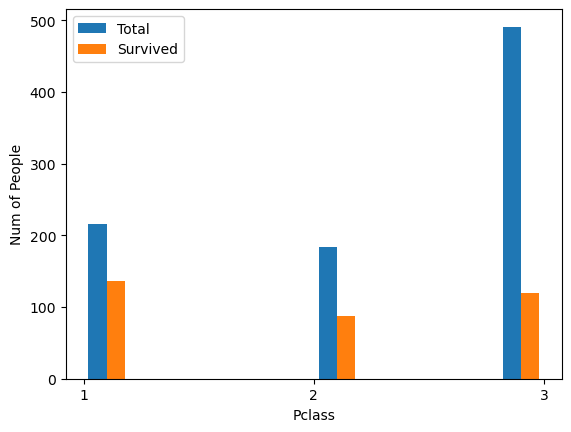

In [18]:
plt.hist([titanic_df['Pclass'], survived['Pclass']])
plt.xticks([1, 2, 3])
plt.legend(['Total', 'Survived'])
plt.xlabel('Pclass')
plt.ylabel('Num of People')

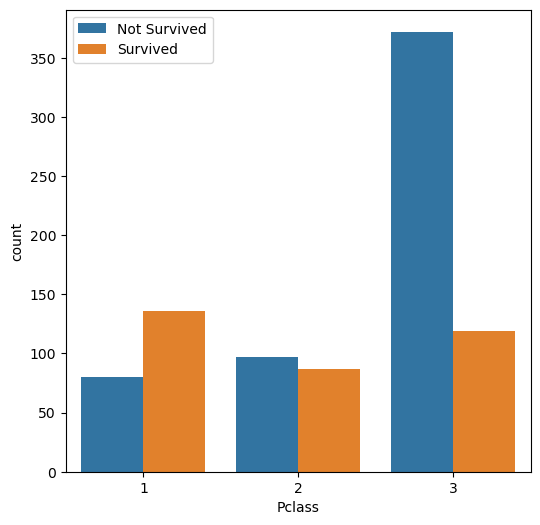

In [19]:
# 객실 전체 승객 대비 사망자가 아닌 객실별 사망자와 생존자를 비교하는 그래프
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(data=titanic_df, x='Pclass', hue='Survived', ax=ax) # ax : 그래프를 그릴 대상을 지정
labels=['Not Survived', 'Survived'] # 범례 표기를 위한 레이블
ax.legend(labels=labels)

#### LAB 10-1 : 학습용 데이터의 전체 인원과 생존자, 사망자를 조사하자

In [26]:
import pandas as pd

main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"
# 타이타닉호 생존자/사망자 데이터 불러오기
titanic_df = pd.read_csv(main_path + 'train.csv')

print('전체 인원:', len(titanic_df))
survived_count = titanic_df[titanic_df['Survived'] == 1]
survived_count

전체 인원: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [27]:
survived_count.shape

(342, 12)

In [28]:
print('생존자 수:', survived_count.shape[0])
un_survived_count = titanic_df[titanic_df['Survived'] == 0]
print('사망자 수:', un_survived_count.shape[0])

print(f'생존율 : {survived_count.shape[0]/len(titanic_df)*100:.3f}%')
print(f'사망율 : {un_survived_count.shape[0]/len(titanic_df)*100:.3f}%')

생존자 수: 342
사망자 수: 549
생존율 : 38.384%
사망율 : 61.616%


#### 10-2 : 탑승 항구별 생존자/사망자를 알아보자

In [29]:
import pandas as pd

main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"
# 타이타닉호 생존자/사망자 데이터 불러오기
titanic_df = pd.read_csv(main_path + 'train.csv')

s = titanic_df[titanic_df['Embarked'] == 'S']
print('사우스햄튼  항의 탑승자 수:', s.shape[0])
c = titanic_df[titanic_df['Embarked'] == 'C']
print('셰르부르 항의 탑승자 수:', c.shape[0])
q = titanic_df[titanic_df['Embarked'] == 'Q']
print('퀸스타운 항의 탑승자 수:', q.shape[0])
s_surv = s[s['Survived'] == 1]
c_surv = c[c['Survived'] == 1]
q_surv = q[q['Survived'] == 1]
print('\n사우스햄튼 항 탑승자 중 생존자 수:', s_surv.shape[0])
print(f'사우스햄튼 항 탑승자 중 생존율: {s_surv.shape[0]/s.shape[0]*100:.3f}%')
print('셰르부르 항 탑승자 중 생존자 수:', c_surv.shape[0])
print(f'셰르부르 항 탑승자 중 생존율: {c_surv.shape[0]/c.shape[0]*100:.3f}%')
print('퀸스타운 항 탑승자 중 생존자 수:', q_surv.shape[0])
print(f'퀸스타운 항 탑승자 중 생존율: {q_surv.shape[0]/q.shape[0]*100:.3f}%')

사우스햄튼  항의 탑승자 수: 644
셰르부르 항의 탑승자 수: 168
퀸스타운 항의 탑승자 수: 77

사우스햄튼 항 탑승자 중 생존자 수: 217
사우스햄튼 항 탑승자 중 생존율: 33.696%
셰르부르 항 탑승자 중 생존자 수: 93
셰르부르 항 탑승자 중 생존율: 55.357%
퀸스타운 항 탑승자 중 생존자 수: 30
퀸스타운 항 탑승자 중 생존율: 38.961%


### 10.5 성에 따른 생존율, 가족 수에 따른 생존율

In [30]:
titanic_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


(array([233.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

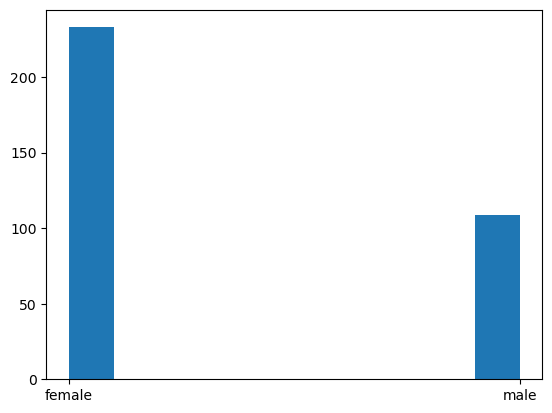

In [31]:
import matplotlib.pyplot as plt

# titanic_df.Survived 열이 1인(생존자) 데이터프레임을 만들자
survived = titanic_df[titanic_df.Survived==1]
plt.hist(survived['Sex'])

Text(0, 0.5, 'Num of People')

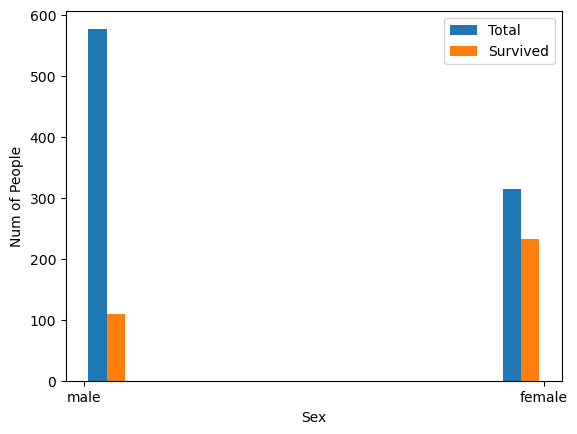

In [34]:
plt.hist([titanic_df['Sex'], survived['Sex']])
plt.legend(['Total', 'Survived'])
plt.xlabel('Sex')
plt.ylabel('Num of People')

In [35]:
# 동반한 가족의 수에 따른 생존율
titanic_df[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [36]:
# 정렬하여 확인
df = titanic_df[['SibSp', 'Survived']].groupby(['SibSp']).mean()
df.sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


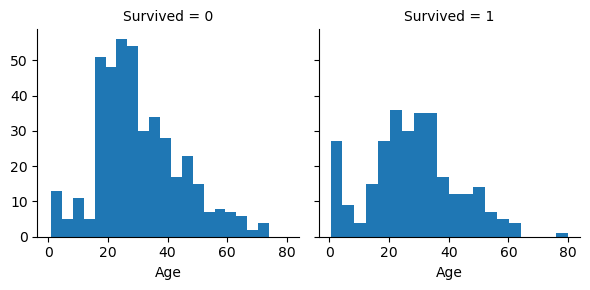

In [37]:
# 시본의 FaceGrid를 사용하여 나이에 따른 생존 여부를 살펴보자
g = sns.FacetGrid(titanic_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

### 10.6 성과 객실 등급에 따른 생존자 파악

In [38]:
print(titanic_df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [39]:
# 남성(male)/여성(famale) 탑승자의 수
print(titanic_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [40]:
# 1등실, 2등실, 3등실 탑승자의 수
print(titanic_df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [41]:
ser = titanic_df['Survived'].value_counts()
# value_counts() 메소드가 반환하는 자료형을 확인하자
type(ser)

pandas.core.series.Series

<Axes: xlabel='Survived'>

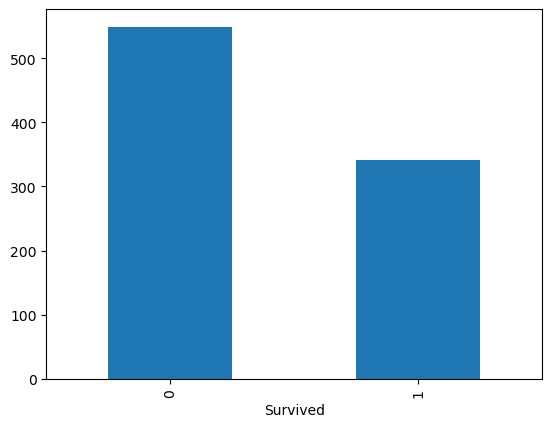

In [42]:
ser.plot.bar()

<Axes: xlabel='Sex'>

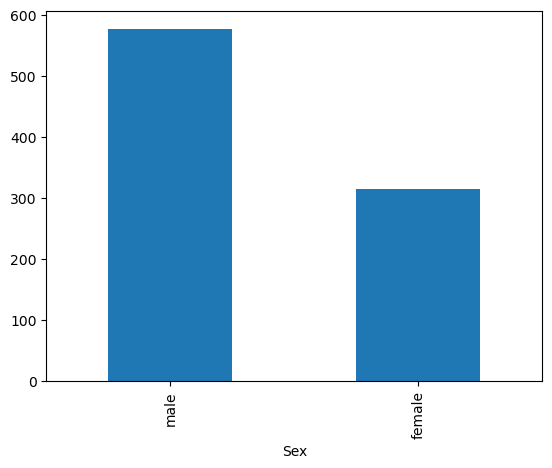

In [43]:
titanic_df['Sex'].value_counts().plot.bar()

### LAB 10-3 : 남성/여성 탑승자를 파이 차트와 막대 차트로 나타내자

[[Text(0, 0, 'male'), Text(1, 0, 'female')]]

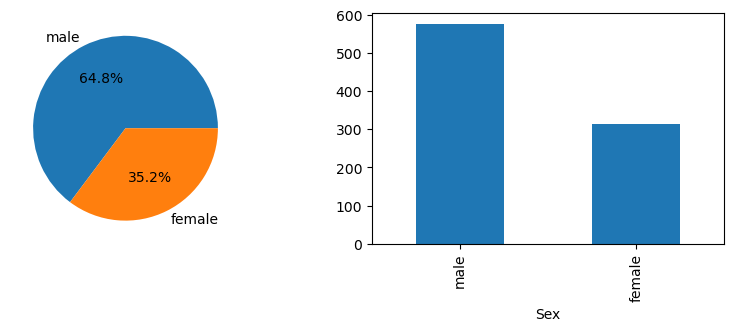

In [44]:
# 1행 2열의 서브플롯을 생성하자
fig, ax = plt.subplots(1, 2, figsize=(10,3))
labels = ['male', 'female']

# 파이 그래프 그리기, 이 파이 그래프를 ax[0](첫 번째 열)에 배치
titanic_df['Sex'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set(ylabel='')

# 막대 그래프 그리기, 이 막대 그래프를 ax[1](두 번째 열)에 배치
titanic_df['Sex'].value_counts().plot.bar(ax=ax[1])
ax[1].set(xticklabels=labels)

### 10.7 객실 등급과 나이별 생존자 수



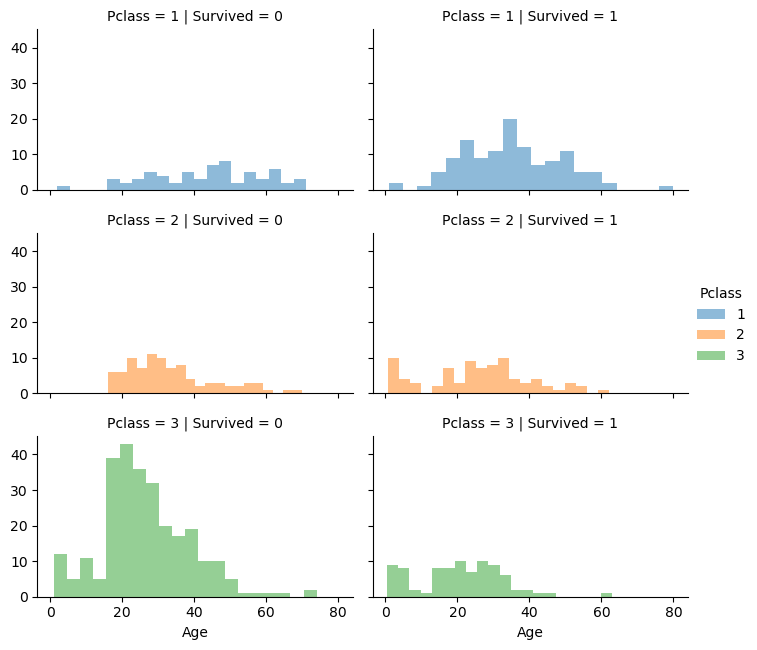

In [47]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(titanic_df, col='Survived', row='Pclass',\
                    hue='Pclass', height=2.2, aspect=1.6) # aspect 세로대비 가로의 길이에 대한 비율
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
#범례 추가22222
grid.add_legend()

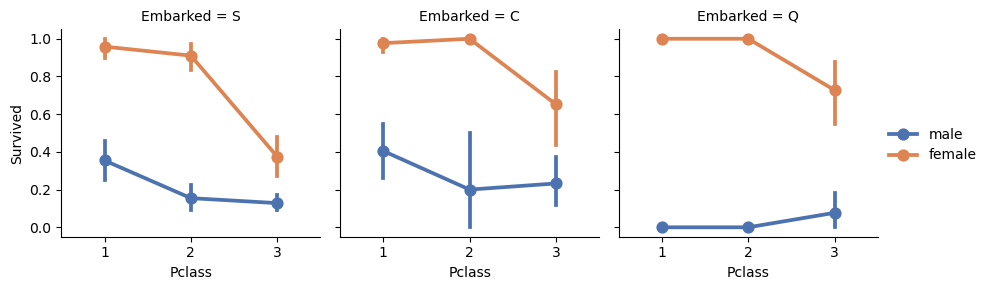

In [48]:
grid = sns.FacetGrid(titanic_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',\
         order = [1, 2, 3], hue_order=['male','female'])
grid.add_legend()

In [51]:
titanic_df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


#### LAB 10-4 : 탑승 요금의 평균을 객실 등급에 따라 나타내자

In [52]:
titanic_df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Text(0, 0.5, 'Mean Fare')

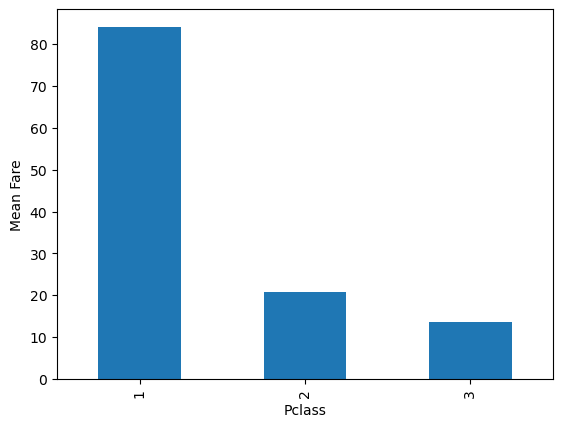

In [53]:
# 타이타닉 데이터프레임을 Pclass라는 그룹으로 묶어서 요금의 평균을 구한다
s = titanic_df.groupby('Pclass')['Fare'].mean()
s.plot.bar()
plt.xlabel('Pclass')
plt.ylabel('Mean Fare')

#### LAB 10-3 : 타이타닉호 승객들의 요금 구간과 생존자 수

Text(0, 0.5, 'Num of People')

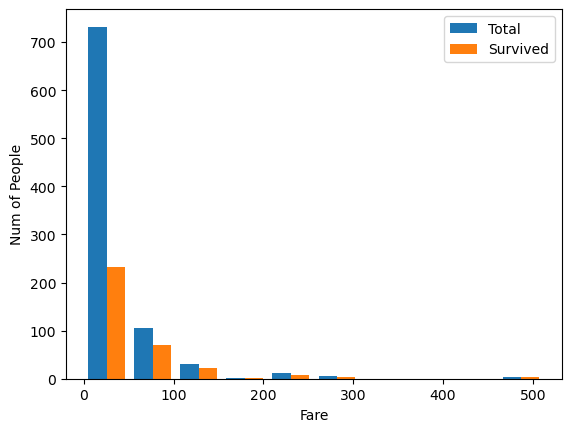

In [54]:
survived = titanic_df[titanic_df.Survived==1]
plt.hist([titanic_df['Fare'], survived['Fare']])
plt.legend(['Total', 'Survived'])
plt.xlabel('Fare')
plt.ylabel('Num of People')

<Axes: >

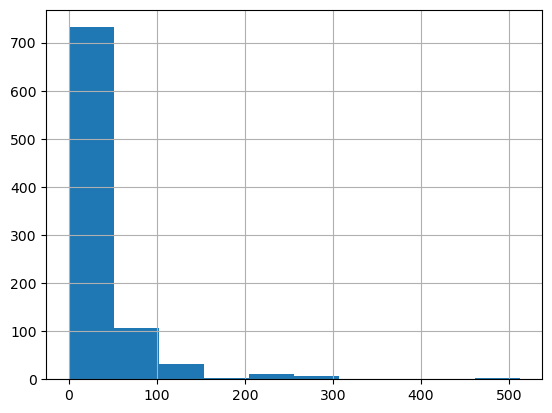

In [55]:
titanic_df['Fare'].hist(bins=10)

<Axes: >

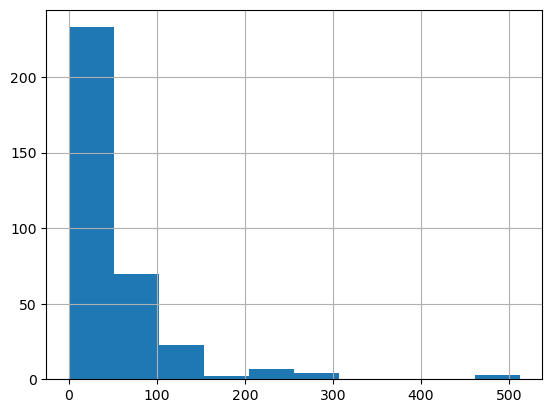

In [56]:
survived['Fare'].hist(bins=10)

### 10.8 정박한 항구와 남녀 비율을 피벗 테이블로 살펴보자

In [57]:
titanic_df.groupby('Embarked').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"
# 타이타닉호의 train.csv 데이터와 유사하나 Survived 열이 없다
test_df = pd.read_csv(main_path + 'test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.info()